In [25]:
# Python base libraries
import os

# Data science libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
from textblob import Word
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import plotly.express as px

# Custom libraries
# from src.data_exploration.data_preprocessing import *
# from src.data_exploration.eda import *
# from src.utils.misc_utils import *

In [26]:
# Load csv
df = pd.read_csv('data/goemotions.csv')

# Show first 5 rows
df.head()

,text,emotion
0,We can hope,optimism
1,Shhh don't give them the idea!,anger
2,"Thank you so much, kind stranger. I really nee...",gratitude
3,Ion know but it would be better for you to jus...,neutral
4,I'm honestly surprised. We should have fallen ...,excitement


Este dataset contiene dos columnas, una con el texto y otra con la emoción

# Comprobar si hay duplicados

In [27]:
# Number of duplicate rows
df.duplicated().sum()

53525

In [28]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(118295, 2)

# Comprobar los tipos de los datos y si hay valores nulos

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118295 entries, 0 to 171819
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     118295 non-null  object
 1   emotion  118295 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


Ambas columnas son de tipo objeto

In [30]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

No hay duplicados

# Análisis de class imbalance

In [31]:
# check class imbalance in percentage
df['emotion'].value_counts(normalize=True) * 100

emotion
neutral           26.582696
approval           7.537935
admiration         5.773701
annoyance          5.762712
disapproval        5.045860
curiosity          3.457458
realization        3.432943
anger              3.368697
disappointment     3.354326
gratitude          3.304451
amusement          3.277400
confusion          3.265565
optimism           2.978148
joy                2.858109
love               2.499683
sadness            2.473477
caring             2.317089
surprise           2.201276
excitement         2.082083
disgust            1.997549
desire             1.421869
fear               1.094721
embarrassment      1.011877
remorse            0.940868
nervousness        0.590896
relief             0.575679
pride              0.530031
grief              0.262902
Name: proportion, dtype: float64

# Procesamiento de texto

In [32]:
# Download stopwords and wordnet
nltk.download("stopwords")
nltk.download("wordnet")

# Load stopwords
stop_words = stopwords.words("english")
# Create lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blanca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/blanca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# Apply lemmatization
df["clean_text"] = df["text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# Remove stopwords
df["clean_text"] = df["text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

In [34]:
df.head()

,text,emotion,clean_text
0,We can hope,optimism,We hope
1,Shhh don't give them the idea!,anger,Shhh give idea!
2,"Thank you so much, kind stranger. I really nee...",gratitude,"Thank much, kind stranger. I really need"
3,Ion know but it would be better for you to jus...,neutral,"Ion know would better buy trim make yourself, ..."
4,I'm honestly surprised. We should have fallen ...,excitement,I'm honestly surprised. We fallen much farther


# Distribución de frecuencias

In [38]:
# Get the number of occurrences of every word in the dataset in a dataframe
word_freq = pd.Series(" ".join(df["clean_text"]).split()).value_counts()
word_freq

I             39887
[NAME]        15956
like           8846
get            4758
would          4679
              ...  
historians        1
outshot           1
12-5              1
scoreless?        1
daily?            1
Name: count, Length: 67958, dtype: int64

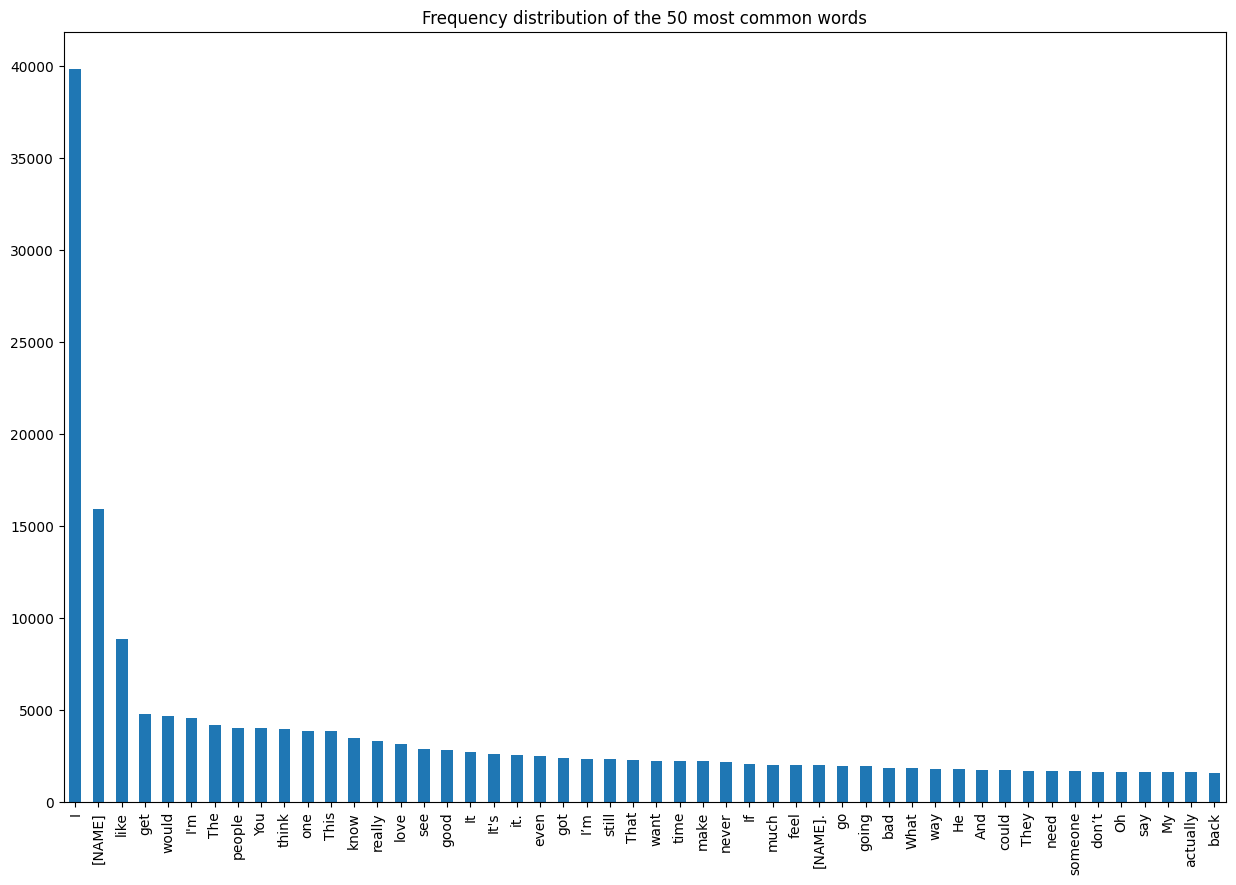

In [39]:
# Plot the frequency distribution of the 50 most common words in the dataset
plt.figure(figsize=(15, 10))
word_freq[:50].plot(kind="bar")
plt.title("Frequency distribution of the 50 most common words")
plt.show()

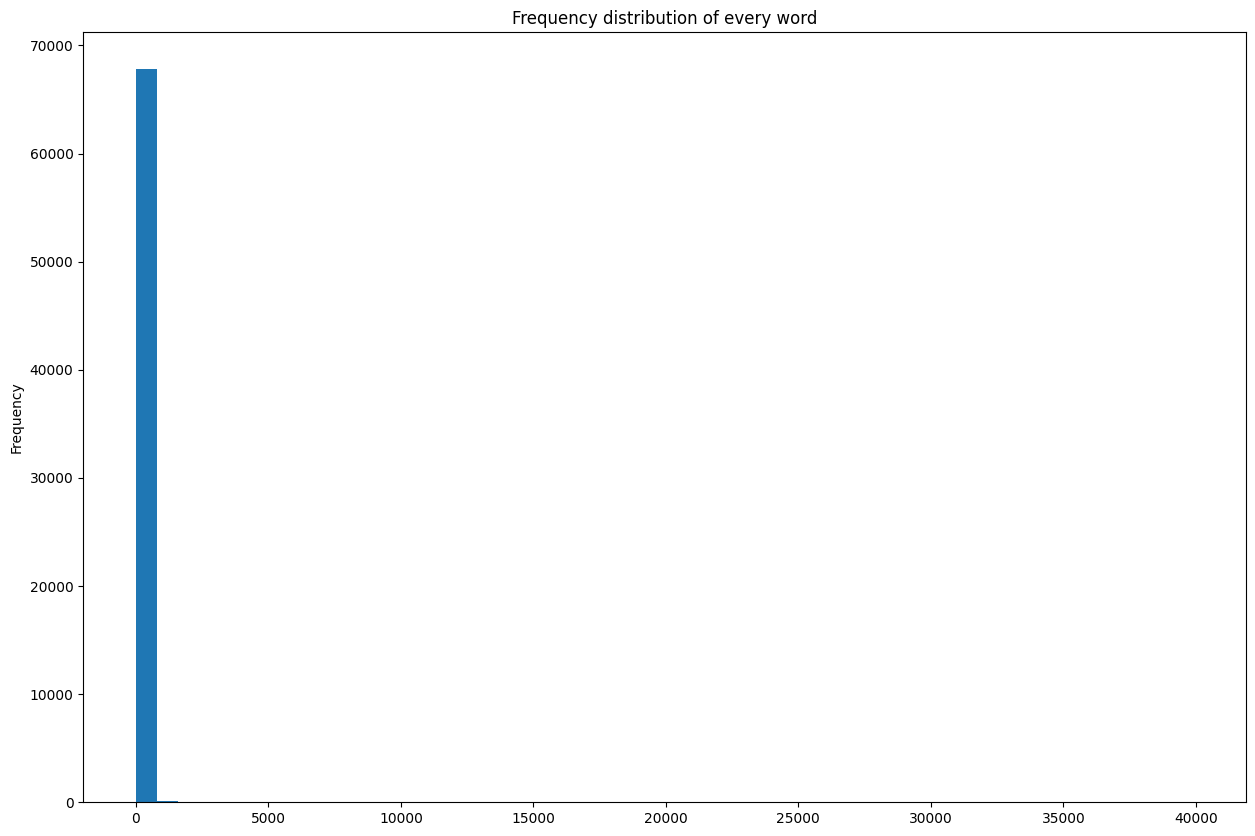

In [40]:
# Plot the frequency distribution of every word in the dataset
plt.figure(figsize=(15, 10))
word_freq.plot(kind="hist", bins=50)
plt.title("Frequency distribution of every word")
plt.show()

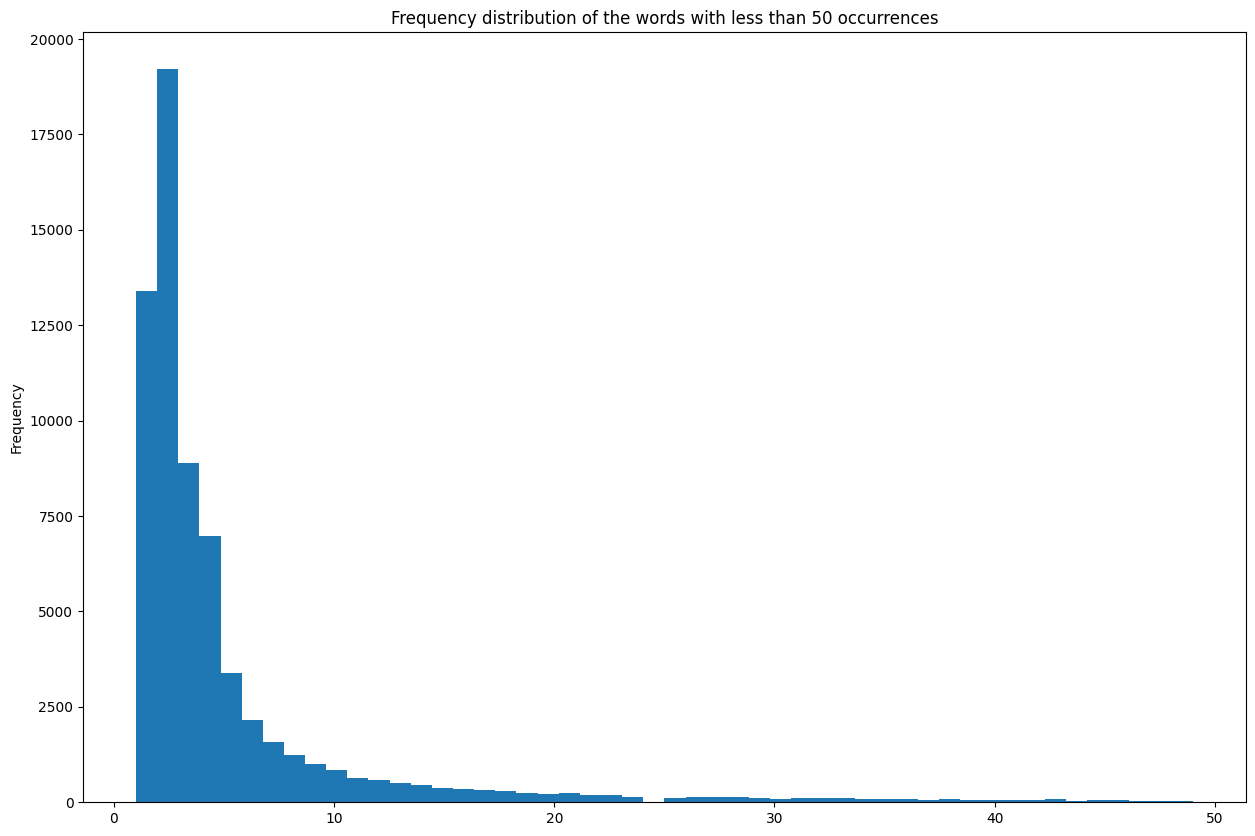

In [41]:
# Plot the frequency distribution of the words with less than 50 occurrences
plt.figure(figsize=(15, 10))
word_freq[word_freq < 50].plot(kind="hist", bins=50)
plt.title("Frequency distribution of the words with less than 50 occurrences")
plt.show()

In [46]:
# Print the number of different words in the dataset
print(f"Number of different words in the dataset: {len(word_freq)}")
# Create a table with the number of words with less than 10, 5, 3 and 2 occurrences. Two columns: frequency and number of words
words_10 = len(word_freq[word_freq < 10])
words_5 = len(word_freq[word_freq < 5])
words_3 = len(word_freq[word_freq < 3])
words_2 = len(word_freq[word_freq < 2])
words_table = pd.DataFrame(
    {
        "Frequency": [10, 5, 3, 2],
        "Number of words": [words_10, words_5, words_3, words_2]
    }
)
words_table

Number of different words in the dataset: 67958


,Frequency,Number of words
0,10,57838
1,5,48473
2,3,32624
3,2,13407


In [47]:
# Create a dictionary with the words and their frequency for faster access
word_freq_dict = word_freq.to_dict()

# Distribución del la longitud del texto

In [49]:
# Get the length of every text
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
df.head()

,text,emotion,clean_text,text_length
0,We can hope,optimism,We hope,2
1,Shhh don't give them the idea!,anger,Shhh give idea!,3
2,"Thank you so much, kind stranger. I really nee...",gratitude,"Thank much, kind stranger. I really need",7
3,Ion know but it would be better for you to jus...,neutral,"Ion know would better buy trim make yourself, ...",10
4,I'm honestly surprised. We should have fallen ...,excitement,I'm honestly surprised. We fallen much farther,7


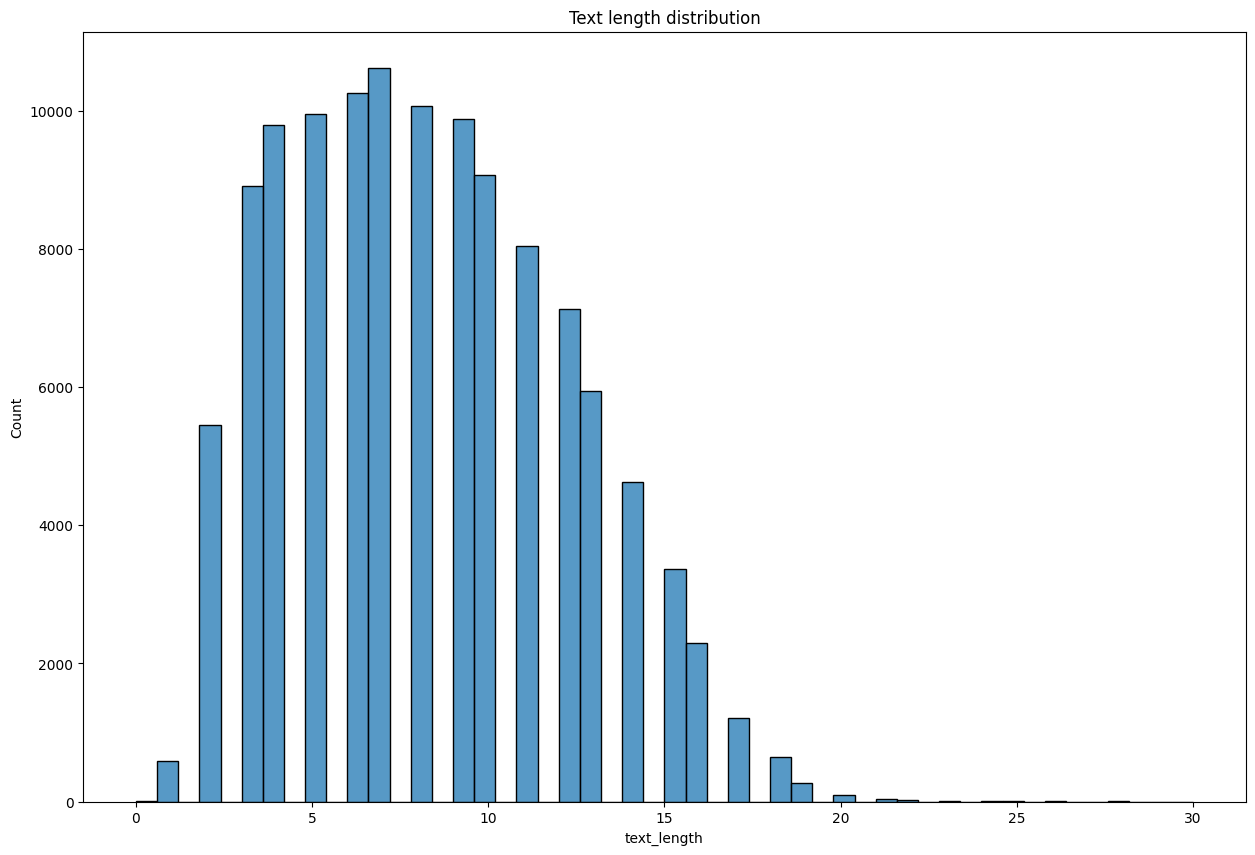

In [50]:
# plot text length distribution
plt.figure(figsize=(15, 10))
sns.histplot(df["text_length"], bins=50)
plt.title("Text length distribution")
plt.show()


In [51]:
# Drop the headlines with 2 or less elements
short_texts = df[df["text_length"] <= 2]
print(f"Number of texts with 2 or less elements: {short_texts.shape[0]}")

# Drop the headlines with 2 or less elements
df = df[df["text_length"] > 2]

Number of texts with 2 or less elements: 6039


In [52]:
# Drop headlines with 20 or more
long_texts = df[df["text_length"] >= 20]
print(f"Number of texts with 20 or more elements: {long_texts.shape[0]}")

# Drop the headlines with 20 or more elements
df = df[df["text_length"] < 20]

Number of texts with 20 or more elements: 182


# Save csv

In [53]:
# Let's save the preprocessed dataset into a CSV file, so we can use it in following notebooks. Before doing so, we'll remove the empty rows
df.dropna(inplace=True)
df.to_csv("data/goemotions_clean.csv", index=False)

# Word cloud


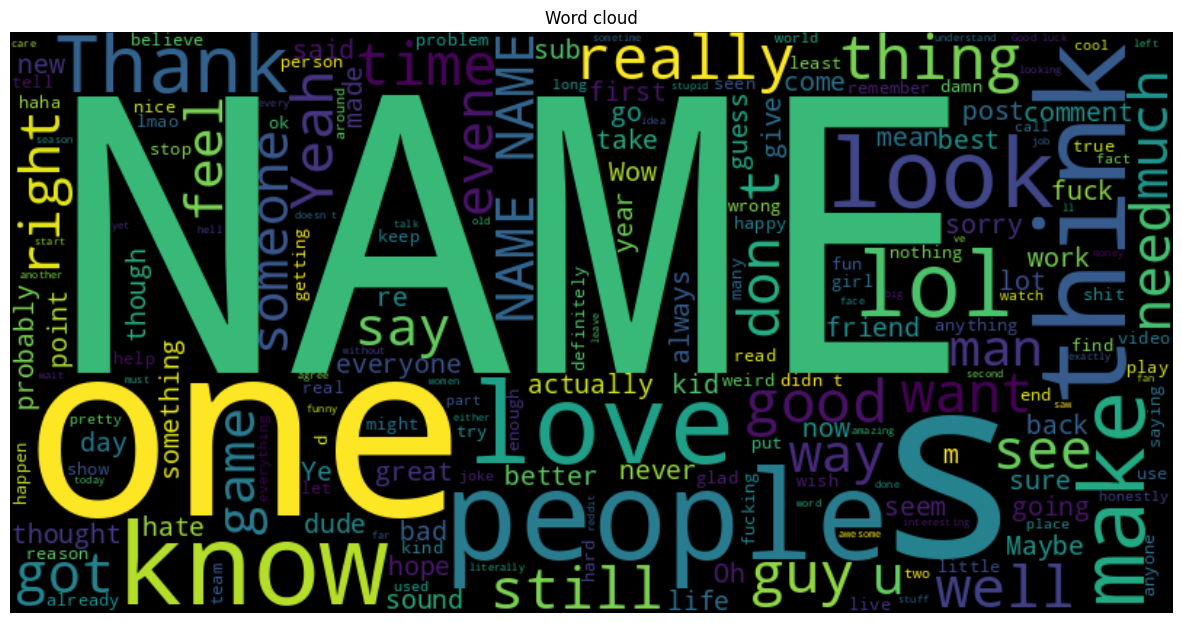

In [55]:
# plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(df["clean_text"]))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud")
plt.show()


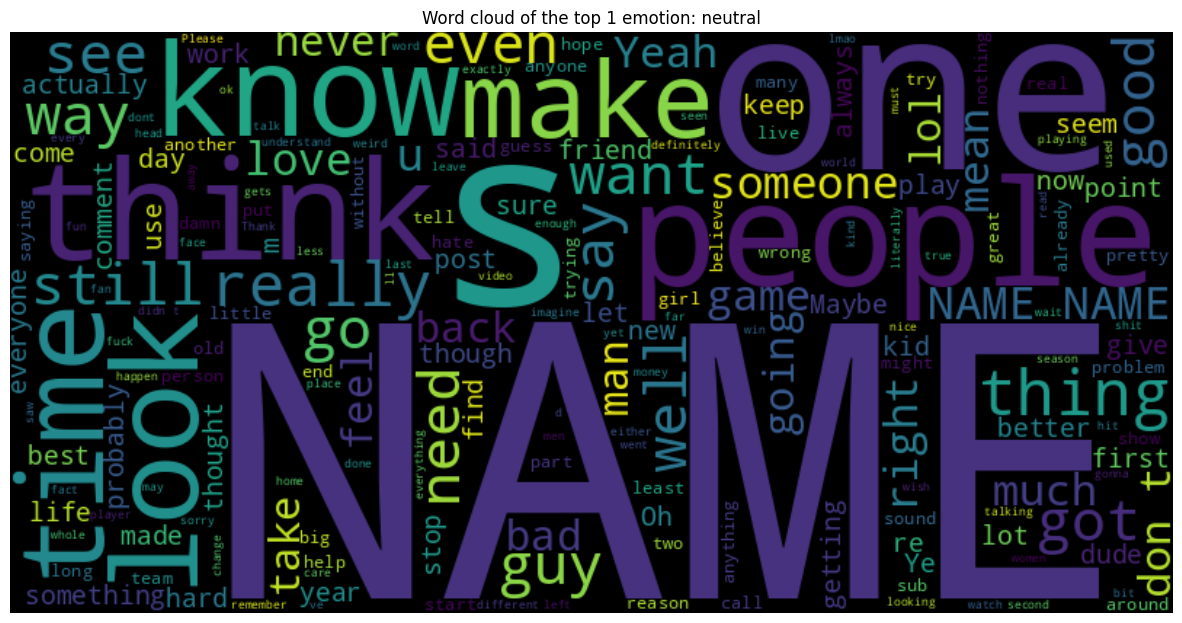

In [56]:
# word cloud of the top 1 emotion: neutral 
neutral = df[df["emotion"] == "neutral"]
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(neutral["clean_text"]))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the top 1 emotion: neutral")
plt.show()


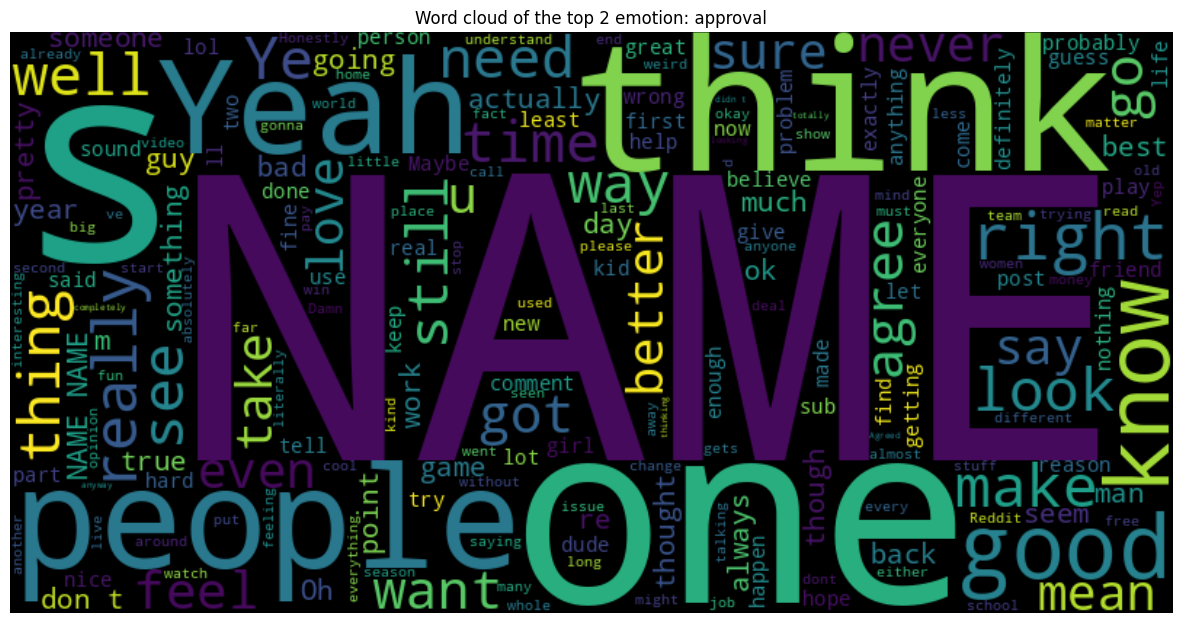

In [57]:
# word cloud of the top 2 emotion: approval
approval = df[df["emotion"] == "approval"]
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(approval["clean_text"]))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the top 2 emotion: approval")
plt.show()

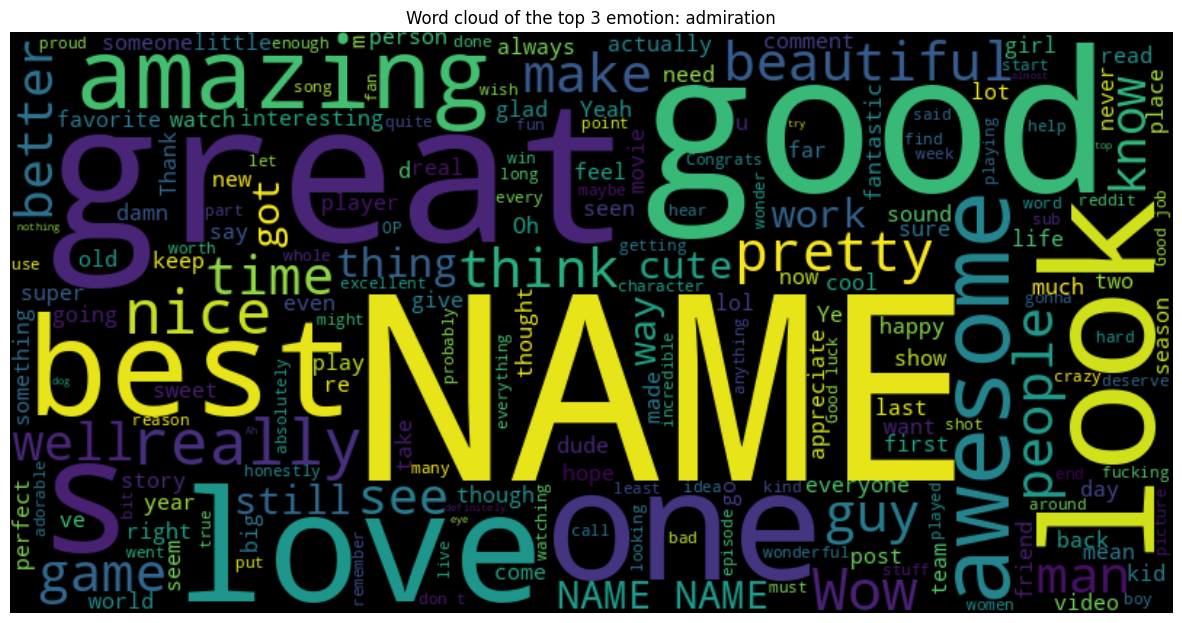

In [58]:
# word cloud of the top 3 emotion: admiration
admiration = df[df["emotion"] == "admiration"]
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(admiration["clean_text"]))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the top 3 emotion: admiration")
plt.show()
